## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the File

In [22]:
df = pd.read_csv('Heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [25]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [26]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

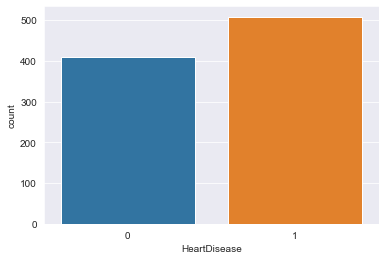

In [27]:
sns.countplot(x= 'HeartDisease', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

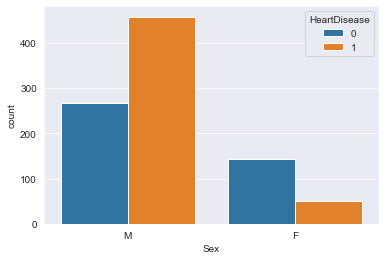

In [28]:
sns.countplot(x = 'Sex', data= df, hue = 'HeartDisease')

In [29]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
sex.head()

,M
0,1
1,0
2,1
3,0
4,1


<AxesSubplot:xlabel='Age', ylabel='Count'>

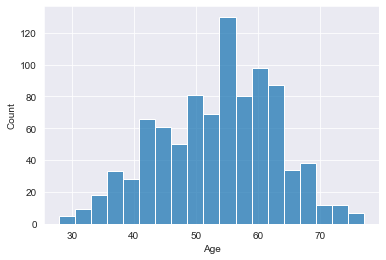

In [30]:
sns.histplot(x= 'Age', data = df)

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

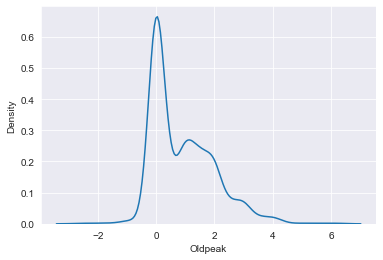

In [31]:
sns.kdeplot(x = 'Oldpeak', data = df)

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

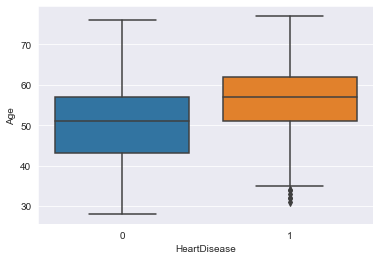

In [32]:
sns.boxplot(x = 'HeartDisease', y= 'Age', data =df)

## Data Cleaning

In [33]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder = LabelEncoder()
encoder.fit(df['ChestPainType'])

LabelEncoder()

In [36]:
df['Chest Pain Encoded'] = encoder.transform(df['ChestPainType'])

In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Chest Pain Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,2


In [38]:
df['Chest Pain Encoded'].unique()

array([1, 2, 0, 3])

In [39]:
df.isnull().sum()

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
HeartDisease          0
Chest Pain Encoded    0
dtype: int64

<AxesSubplot:>

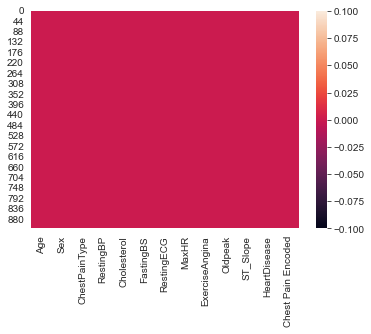

In [40]:
sns.heatmap(df.isnull())

In [41]:
df.eq(0).sum()

Age                     0
Sex                     0
ChestPainType           0
RestingBP               1
Cholesterol           172
FastingBS             704
RestingECG              0
MaxHR                   0
ExerciseAngina          0
Oldpeak               368
ST_Slope                0
HeartDisease          410
Chest Pain Encoded    496
dtype: int64

In [42]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Chest Pain Encoded'],
      dtype='object')

In [43]:
df[['RestingBP', 'Cholesterol']] = df[['RestingBP', 'Cholesterol']].replace(0, np.nan)

<AxesSubplot:>

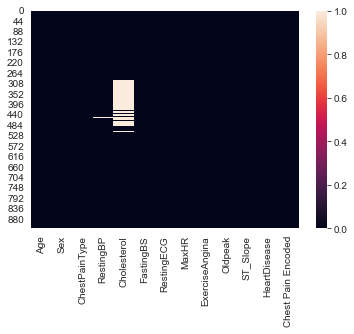

In [44]:
sns.heatmap(df.isnull())

In [45]:
df.fillna(df.mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_10764/820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [46]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Chest Pain Encoded
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,2
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,2


In [47]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [48]:
ecg_encoder = LabelEncoder()
ecg_encoder.fit(df['RestingECG'])
df['Resting ECG Encoded'] = ecg_encoder.transform(df['RestingECG'])

In [49]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Chest Pain Encoded,Resting ECG Encoded
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,1,1
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,2,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,1,2
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,2,1


In [50]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [51]:
angina_encoder = LabelEncoder()
df['Excersise Angina Encoded'] = angina_encoder.fit_transform(df['ExerciseAngina'])

In [52]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [53]:
st_slope_encoder = LabelEncoder()
df['ST Slope Encoded'] = st_slope_encoder.fit_transform(df['ST_Slope'])

In [54]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Chest Pain Encoded,Resting ECG Encoded,Excersise Angina Encoded,ST Slope Encoded
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,1,1,0,2
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,2,1,0,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,1,2,0,2
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,0,1,1,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,2,1,0,2


In [55]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Chest Pain Encoded,Resting ECG Encoded,Excersise Angina Encoded,ST Slope Encoded
Age,1.000000,0.263081,0.053373,0.198039,-0.382045,0.258612,0.282039,-0.077150,-0.007484,0.215793,-0.268264
RestingBP,0.263081,1.000000,0.083076,0.067811,-0.109662,0.174220,0.117938,-0.011010,0.023455,0.153008,-0.082139
Cholesterol,0.053373,0.083076,1.000000,0.043008,-0.017239,0.053029,0.094071,-0.092681,-0.063612,0.077549,-0.069723
FastingBS,0.198039,0.067811,0.043008,1.000000,-0.131438,0.052698,0.267291,-0.073151,0.087050,0.060451,-0.175774
MaxHR,-0.382045,-0.109662,-0.017239,-0.131438,1.000000,-0.160691,-0.400421,0.289123,-0.179276,-0.370425,0.343419
Oldpeak,0.258612,0.174220,0.053029,0.052698,-0.160691,1.000000,0.403951,-0.177377,-0.020438,0.408752,-0.501921
HeartDisease,0.282039,0.117938,0.094071,0.267291,-0.400421,0.403951,1.000000,-0.386828,0.057384,0.494282,-0.558771
Chest Pain Encoded,-0.077150,-0.011010,-0.092681,-0.073151,0.289123,-0.177377,-0.386828,1.000000,-0.072537,-0.354727,0.213521
Resting ECG Encoded,-0.007484,0.023455,-0.063612,0.087050,-0.179276,-0.020438,0.057384,-0.072537,1.000000,0.077500,-0.006778
Excersise Angina Encoded,0.215793,0.153008,0.077549,0.060451,-0.370425,0.408752,0.494282,-0.354727,0.077500,1.000000,-0.428706


In [56]:
df.corr()['HeartDisease']

Age                         0.282039
RestingBP                   0.117938
Cholesterol                 0.094071
FastingBS                   0.267291
MaxHR                      -0.400421
Oldpeak                     0.403951
HeartDisease                1.000000
Chest Pain Encoded         -0.386828
Resting ECG Encoded         0.057384
Excersise Angina Encoded    0.494282
ST Slope Encoded           -0.558771
Name: HeartDisease, dtype: float64

In [57]:
df.corr()['HeartDisease'].sort_values()

ST Slope Encoded           -0.558771
MaxHR                      -0.400421
Chest Pain Encoded         -0.386828
Resting ECG Encoded         0.057384
Cholesterol                 0.094071
RestingBP                   0.117938
FastingBS                   0.267291
Age                         0.282039
Oldpeak                     0.403951
Excersise Angina Encoded    0.494282
HeartDisease                1.000000
Name: HeartDisease, dtype: float64

In [58]:
df.corr() ['HeartDisease'].sort_values(ascending = False)

HeartDisease                1.000000
Excersise Angina Encoded    0.494282
Oldpeak                     0.403951
Age                         0.282039
FastingBS                   0.267291
RestingBP                   0.117938
Cholesterol                 0.094071
Resting ECG Encoded         0.057384
Chest Pain Encoded         -0.386828
MaxHR                      -0.400421
ST Slope Encoded           -0.558771
Name: HeartDisease, dtype: float64

<AxesSubplot:>

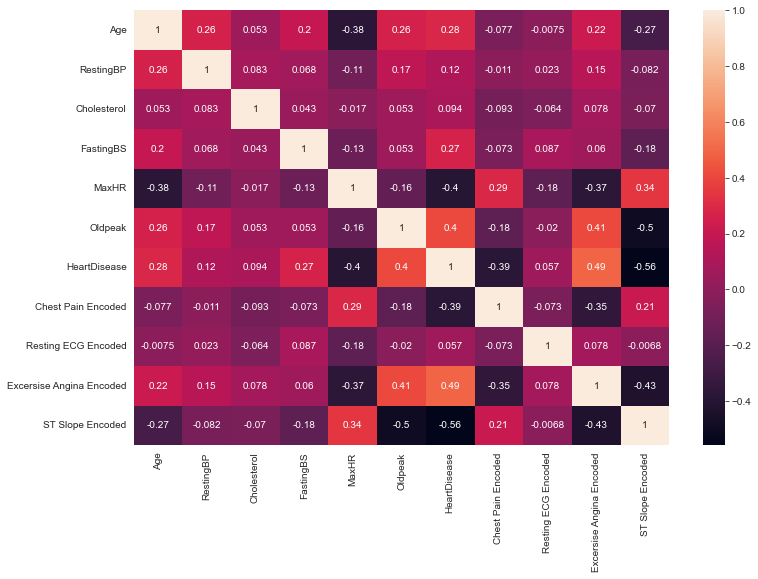

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True)

In [60]:
df = pd.concat([df, sex], axis = 1)

In [61]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Chest Pain Encoded,Resting ECG Encoded,Excersise Angina Encoded,ST Slope Encoded,M
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,1,1,0,2,1
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,2,1,0,1,0
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,1,2,0,2,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,0,1,1,1,0
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,2,1,0,2,1


In [62]:
df.rename(columns = {'M':'Gender'}, inplace = True)

In [63]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Chest Pain Encoded', 'Resting ECG Encoded',
       'Excersise Angina Encoded', 'ST Slope Encoded', 'Gender'],
      dtype='object')

In [64]:
X = df[['Age', 'Gender', 'Chest Pain Encoded','RestingBP', 'Cholesterol', 'FastingBS', 'Resting ECG Encoded', 'MaxHR', 'Excersise Angina Encoded', 'Oldpeak', 'ST Slope Encoded']]
y = df['HeartDisease']

In [65]:
X

,Age,Gender,Chest Pain Encoded,RestingBP,Cholesterol,FastingBS,Resting ECG Encoded,MaxHR,Excersise Angina Encoded,Oldpeak,ST Slope Encoded
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110.0,264.0,0,1,132,0,1.2,1
914,68,1,0,144.0,193.0,1,1,141,0,3.4,1
915,57,1,0,130.0,131.0,0,1,115,1,1.2,1
916,57,0,1,130.0,236.0,0,0,174,0,0.0,1


In [66]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predictions = lr.predict(X_test)

In [73]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       145
           1       0.85      0.86      0.86       158

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303



In [76]:
lr.fit(X, y)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
import pickle

In [78]:
pickle.dump(lr, open('Model.pkl', 'wb'))

In [79]:
loaded_model = pickle.load(open('Model.pkl', 'rb'))

In [80]:
loaded_model

LogisticRegression()

In [81]:
X.columns

Index(['Age', 'Gender', 'Chest Pain Encoded', 'RestingBP', 'Cholesterol',
       'FastingBS', 'Resting ECG Encoded', 'MaxHR', 'Excersise Angina Encoded',
       'Oldpeak', 'ST Slope Encoded'],
      dtype='object')

In [82]:
loaded_model.predict([[48, 0, 0, 138, 214, 0, 1, 108, 1, 1.5, 1]])

array([1], dtype=int64)

In [83]:
probability = loaded_model.predict_proba([[48, 0, 0, 138, 214, 0, 1, 108, 1, 1.5, 1]])
probability

array([[0.26487768, 0.73512232]])

In [84]:
probability = np.round((np.max(probability) * 100), 2)
probability

73.51

In [85]:
probability

73.51